# <center> Découvrez les librairies Python pour la Data Science </center>

Cours OpenClassRooms : [https://openclassrooms.com/fr/courses/4452741-decouvrez-les-librairies-python-pour-la-data-science](https://openclassrooms.com/fr/courses/4452741-decouvrez-les-librairies-python-pour-la-data-science)

---

# <center>Le problème de Monty Hall</center>

## Génération d'une seule partie de jeu

In [1]:
# Pour afficher les graphiques dans la continuité du code, 
# et non pas dans une fenêtre à part:
%matplotlib inline

# Pour utiliser la fonction randint, qui génère des nombres
# entiers de façon aléatoire:
from random import randint, seed

# Un Enum est une structure de données qui consiste en un 
# ensemble d'éléments nommés. Une variable de ce type peut
# avoir comme valeur un de ces éléments.
from enum import Enum

# Pour pouvoir afficher des graphiques:
import matplotlib.pyplot as plt

In [2]:
# Ici nous définissons une sous-classe de Enum, qui contiendra 
# les stratégies possibles.
class Strategie(Enum):
    CHANGER = 1
    GARDER = 2

In [3]:
# Utilise l'horloge système pour initialiser le générateur de 
# nombres pseudo-aléatoires.
seed()

def play_game(strategie):
    '''Simule une partie du jeu Monty Hall.
    
    Cette fonction simule le choix de la porte par le participant, 
    l'élimination d'une mauvaise porte par le présentateur, et le 
    choix final. Elle ne retourne que le résultat de la partie, parce 
    que nous n'aurons besoin que du résultat pour effectuer nos calculs.
    
    Args:
        strategie (Strategie): La stratégie du joueur
        
    Returns:
        bool: Le joueur a-t-il gagné?
    '''

    portes = [0, 1, 2]
    
    bonne_porte = randint(0,2)
    
    # Choix du joueur
    premier_choix = randint(0,2)
    
    # Il nous reste deux portes
    portes.remove(premier_choix)
    
    # Le présentateur élimine une porte
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_porte]
    
    deuxieme_choix = 0
    # Le deuxieme choix depend de la strategie
    if strategie == Strategie.CHANGER:
        deuxieme_choix = portes[0]
    elif strategie == Strategie.GARDER:
        deuxieme_choix = premier_choix
    else:
        raise ValueError("Stratégie non reconnue!")
    
    return deuxieme_choix == bonne_porte

In [4]:
play_game(Strategie.CHANGER)

True

## Simulation de plusieurs parties

In [5]:
def play(strategie, nb_tours):
    '''Simule une suite de tours du jeu.
    
    Cette fonction renvoie les résultats de plusieurs parties
    du jeu Monty Hall sous forme d'une liste de gains par le 
    joueur.
    
    Args:
        strategie (Strategie): La strategie du joueur
        nb_tours (int): Nombre de tours
        
    Returns:
        list: Liste des gains du joueurs à chaque partie
    '''
    
    # Ceci est une liste en compréhension. Pour en savoir plus, consulter 
    # le cours "Apprenez à programmer en Python" sur OpenClassrooms
    return [1 if play_game(strategie) else 0 for i in range(nb_tours)]

## Analyse des résultats

In [6]:
print("En changeant de porte, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.CHANGER, 10000))))
      
print("En gardant son choix initial, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.GARDER, 10000))))

En changeant de porte, le joueur a gagné 6559 sur 10000 parties.
En gardant son choix initial, le joueur a gagné 3340 sur 10000 parties.


## Visualisation

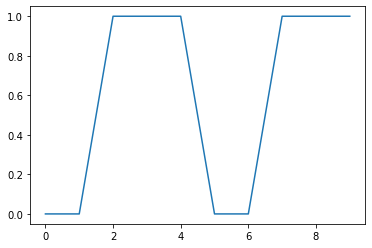

In [7]:
# plot renvoie un objet, que l'on pourra manipuler plus tard pour
# personnaliser le graphique
plot = plt.plot(play(Strategie.CHANGER, 10))

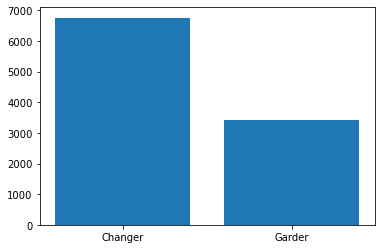

In [8]:
plot = plt.bar([1,2],[sum(play(Strategie.CHANGER, 10000)), 
               sum(play(Strategie.GARDER, 10000))], 
        tick_label=["Changer","Garder"])

## Visualisez une liste de nombres

In [10]:
gains_changer = []
gains_garder = []
samples =  [1000, 10000, 20000, 50000, 80000, 100000]
for tours in samples:
    gains_changer.append(play(Strategie.CHANGER, tours))
    gains_garder.append(play(Strategie.GARDER, tours))

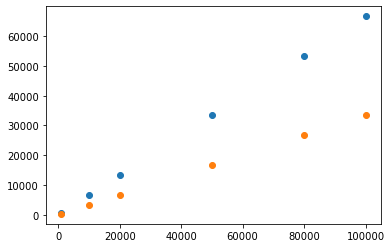

In [11]:
figure = plt.figure()
plot = plt.scatter(samples, [sum(x) for x in gains_changer])
plot = plt.scatter(samples, [sum(x) for x in gains_garder])

## Explication théorique

L'explication de ce résultat est finalement assez simple. Quand le joueur choisit une porte au début du jeu, il a une chance sur trois de tomber sur la porte qui cache le trésor. La probabilité que le trésor se cache derrière une des deux portes restantes est donc de 2/3.

L'élimination par le présentateur d'une des deux portes restantes ne change pas ces probabilités. Il élimine forcément une porte qui ne cache pas de trésor. La probabilité que la porte qu'il n'élimine pas contienne le trésor devient égale à 2/3.


**Plus d'infos sur l'article Wikipédia :** [Problème de Monty Hall](https://fr.wikipedia.org/wiki/Probl%C3%A8me_de_Monty_Hall)

---

# <center> Utilisez Numpy pour illustrer le théorème central limite </center>

## La distribution Gaussienne

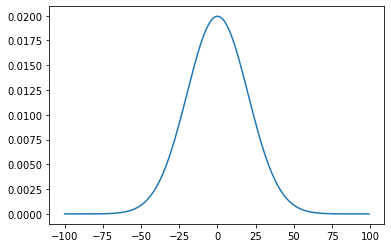

In [12]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, exp

domaine = range(-100,100)
mu = 0
sigma = 20

# Notez l'utilisation du mot clé lambda. Il est très bien expliqué dans le cours
# "Apprenez à programmer en Python" sur OpenClassrooms.
f = lambda x : 1/(sqrt(2*pi*pow(sigma,2))) * exp(-pow((x-mu),2)/(2*pow(sigma,2)))

y = [f(x) for x in domaine]
plot = plt.plot(domaine, y)

## Le théorème central limite

Cette distribution est aussi couramment appelée la distribution normale. La raison de cette appellation est une propriété remarquable : beaucoup d'observations dans le monde réel semblent suivre cette loi. Par exemple, si on mesurait la taille de tous les humains sur terre et affichait l'histogramme de nos observations, nous obtiendrions une courbe très proche de celle que vous voyez au-dessus (avec une moyenne et un écart type différents, bien évidemment).

Cette propriété découle d'un théorème fondamental des probabilités, le théorème central limite. Intuitivement, ce théorème déclare que toute somme de variables aléatoires indépendantes et identiquement distribuées tend vers une variable aléatoire gaussienne. 

## Générez des réalisations de variables aléatoires avec Numpy

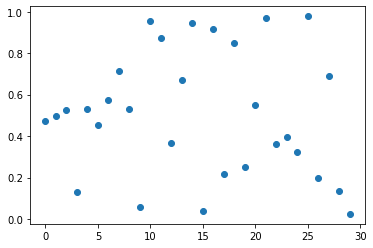

In [13]:
# Réalisation d'une variable aléatoire uniformément distribuée

vecteur_aleatoire = np.random.rand(30)
plot = plt.scatter(range(30),vecteur_aleatoire)

[[0.37160653 0.69758362 0.3079238  0.34120409 0.9164839 ]
 [0.41848529 0.93102371 0.35530586 0.46721223 0.03940599]
 [0.6262602  0.76669708 0.12971044 0.08604856 0.87202747]]


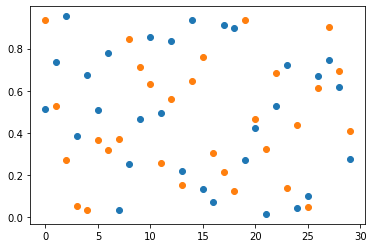

In [14]:
# avec une matrice

matrice_aleatoire_a_imprimer = np.random.rand(3,5)
print(matrice_aleatoire_a_imprimer)
matrice_aleatoire_a_grapher = np.random.rand(2,30)
fig = plt.figure()
plot1 = plt.scatter(range(30),matrice_aleatoire_a_grapher[0,:])
plot2 = plt.scatter(range(30),matrice_aleatoire_a_grapher[1,:])

## Les opérations de base sur les matrices Numpy

In [15]:
# Nous allons considérer 100 variables aléatoires, 
# chacune avec 200 échantillons.
matrice_aleatoire = np.random.rand(100,200)

sommes = np.sum(matrice_aleatoire,0)

In [16]:
print("La taille de la variable sommes est {}.".format(sommes.shape))

La taille de la variable sommes est (200,).


Remarquez que la taille est un peu étrange. C'est un  tuple  avec deux membres, mais le deuxième est vide, au lieu de valoir 1 (après tout nous avons une colonne de nombres). C'est une particularité des tableaux unidimensionnels de Numpy. Grâce à ceci, ce tableau peut être vu, en fonction des opérations, soit comme une ligne, soit comme une colonne. Pour certaines opérations d'algèbre linéaire, il sera nécessaire de convertir ces vecteurs soit en tableaux (1,n), soit en tableaux (n,1). Cette opération se fait grâce à la fonction  reshape.

## Visualisation

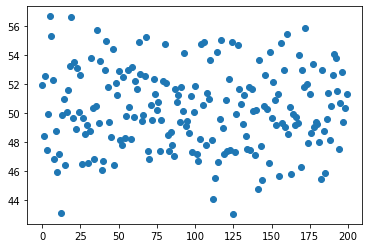

In [17]:
plot = plt.scatter(range(200), sommes)

## Les histogrammes

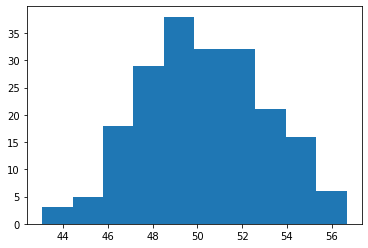

In [18]:
plot = plt.hist(sommes)

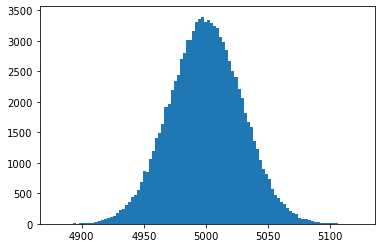

In [19]:
matrice_aleatoire = np.random.rand(10000,100000)
sommes = np.sum(matrice_aleatoire,0)
plot = plt.hist(sommes, bins=100)

## Calculer les propriétés d'un échantillon

In [20]:
print("La moyenne empirique de notre distribution est {}."
      .format(np.mean(sommes)))
print("La moyenne empirique de la variable généré par la fonction rand est {}."
      .format(np.mean(np.random.rand(100000))))
print("La variance empirique de notre distribution est {}."
      .format(np.var(sommes)))
print("La variance empirique de la variable généré par la fonction rand est {}."
      .format(np.var(np.random.rand(100000))))

La moyenne empirique de notre distribution est 4999.7459463830455.
La moyenne empirique de la variable généré par la fonction rand est 0.4997180992811735.
La variance empirique de notre distribution est 837.8895953156981.
La variance empirique de la variable généré par la fonction rand est 0.08348547574312484.


**La moyenne de notre distribution est égale à la somme des moyennes des distributions qui la composent. La variance est la somme des variances des distributions qui composent notre distribution. Attention, ces propriétés ne sont valables que parce que nos distributions sont indépendantes.**

---

## Plongez en détail dans la librairie NumPy

NumPy (diminutif de Numerical Python) fournit une interface pour stocker et effectuer des opérations sur les données. D'une certaine manière, les tableaux Numpy sont comme les listes en Python, mais Numpy permet de rendre les opérations beaucoup plus efficaces, surtout sur les tableaux de large taille. Les tableaux Numpy sont au cœur de presque tout l'écosystème de data science en Python.

Contrairement aux listes en Python, les tableaux Numpy ne peuvent contenir des membres que d'un seul type. Ce type est automatiquement déduit au moment de la création du tableau, et a un impact sur les opérations qui y seront appliquées. On peut aussi spécifier le type manuellement. Nous allons voir des exemples pour les deux cas tout de suite. On peut créer des tableaux de différentes façons dans Numpy.

In [ ]:
# Une liste de listes est transformée en un tableau multi-dimensionnel
np.array([range(i, i + 3) for i in [2, 4, 6]])

### Créer les tableaux directement

Il est souvent plus efficace, surtout pour les tableaux larges, de les créer directement. Numpy contient plusieurs fonctions pour cette tâche.

In [ ]:
# Un tableau de longueur 10, rempli d'entiers qui valent 0
np.zeros(10, dtype=int)

# Un tableau de taille 3x5 rempli de nombres à virgule flottante de valeur 1
np.ones((3, 5), dtype=float)

# Un tableau 3x5 rempli de 3,14
np.full((3, 5), 3.14)

# Un tableau rempli d'une séquence linéaire
# commençant à 0 et qui se termine à 20, avec un pas de 2
np.arange(0, 20, 2)

# Un tableau de 5 valeurs, espacées uniformément entre 0 et 1
np.linspace(0, 1, 5)

# Celle-ci vous la conaissez déjà! Essayez aussi "randint" et "normal"
np.random.random((3, 3))

# La matrice identité de taille 3x3 
# (matrice identité : https://fr.wikipedia.org/wiki/Matrice_identit%C3%A9)
np.eye(3)

### Les propriétés des tableaux

Chaque tableau Numpy a des propriétés qui se révèlent souvent utiles.

In [ ]:
np.random.seed(0)
x1 = np.random.randint(10, size=6)  # Tableau de dimension 1
print("nombre de dimensions de x1: ", x1.ndim)
print("forme de x1: ", x1.shape)
print("taille de x1: ", x1.size)
print("type de x1: ", x1.dtype)

### Indexation et Slicing

Nous aurons souvent besoin d'accéder à un ou plusieurs éléments contigus d'un tableau. Heureusement, avec Numpy, c'est chose aisée.

**Accéder à un seul élément**

In [ ]:
print(x1)

# Pour accéder au premier élément
print(x1[0])

# Pour accéder au dernier élément
print(x1[-1])

x2 = np.random.randint(10, size=(3, 4))  # Tableau de dimension 2
print(x2[0,1])

# On peut aussi modifier les valeurs
x1[1] = "1000"
print(x1)

# Attention au type
x1[1] = 3.14
print(x1)

**Accéder à plusieurs éléments**

De la même façon que nous pouvons indexer des éléments grâce à  `[]`, nous pouvons accéder à un ensemble d'éléments en combinant  `[]`  et  `:`. La syntaxe suit une règle simple :  `x[début:fin:pas]`.   

In [ ]:
print(x1[:5])  # Les cinq premiers éléments

print(x1[5:])  # Les éléments à partir de l'index 5

print(x1[::2])  # Un élément sur deux

Si le pas est négatif, le début et la fin du slice sont inversés. On peut utiliser cette propriété pour inverser un tableau.

In [ ]:
x1[::-1]

On peut accéder de la même façon aux éléments d'un tableau multi-dimensionnel. Par exemple, on a souvent besoin d'accéder à une ligne ou une colonne d'une matrice.

In [ ]:
print(x2)

x2[0,:] # La première ligne

### Concaténation

On peut concaténer deux ou plusieurs tableaux.

In [ ]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

## Agrégation

Très souvent, face à de larges quantités de données, la première chose à faire est de calculer des statistiques sur nos données, comme la moyenne ou l'écart type. Numpy a des fonctions pour calculer ces données sur ses tableaux.

In [ ]:
L = np.random.random(100)
np.sum(L)

Parmi les nombreuses fonctions disponibles, notons :
-  `np.std`  pour calculer l'écart type
-  `np.argmin`  pour trouver l'index de l'élément minimum
-  `np.percentile`  pour calculer des statistiques sur les éléments

## Broadcasting

Le broadcasting désigne un ensemble de règles pour appliquer une opération qui normalement ne s'applique que sur une seule valeur à l'ensemble des membres d'un tableau Numpy. Par exemple, pour les tableaux de même taille, les opérations comme l'addition s'appliquent normalement élément par élément.

In [ ]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

Le broadcasting nous permet d'appliquer ces opérations sur des tableaux de dimensions différentes. Par exemple : 

`a + 5`

C'est comme si Numpy avait converti la valeur 5 en un tableau de taille 3, et ensuite avait additionné ce tableau à celui contenu dans a. Ce n'est qu'une vue d'esprit faite pour comprendre ce qui se passe. Numpy se passe de toutes ces opérations annexes, ce qui rend le tout plus rapide.

## Entraînez-vous en simulant le problème de Monty Hall avec Numpy

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [5]:
N_TRIALS = 1000
prizes = np.random.randint(0,3, size=(N_TRIALS)) # Attention, 3 pour numpy, et non pas 2

first_choices = np.random.randint(0,3, size=(N_TRIALS))
# Si le joueur change de porte, il ne gagne que si son premier choix n'était pas le bon

switching_player_gains = (prizes!=first_choices).astype(int)
keeping_player_gains = (prizes==first_choices).astype(int)

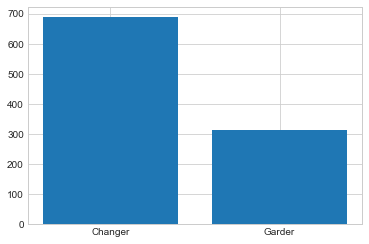

In [3]:
plot = plt.bar([1,2],[switching_player_gains.sum(),
keeping_player_gains.sum()],
tick_label=["Changer","Garder"])

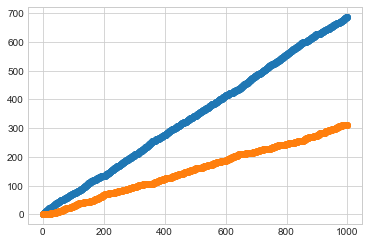

In [4]:
figure = plt.figure()
plot = plt.scatter(range(N_TRIALS), switching_player_gains.cumsum())
plot = plt.scatter(range(N_TRIALS), keeping_player_gains.cumsum())

---

# <center>Maîtrisez les possibilités offertes par Matplotlib</center>

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [14]:
x = np.linspace(0, 10, 1000)

[Text(0.5, 21.200000000000003, 'x'), Text(21.200000000000003, 0.5, 'sin(x)')]

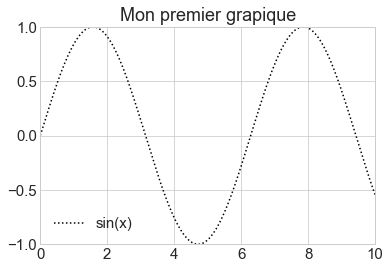

In [40]:
plt.rcParams.update({ 'font.size': 15})
plt.plot(x, np.sin(x), color='black', linestyle='dotted', label='sin(x)')
plt.axis([0, 10, -1, 1])
plt.title('Mon premier grapique')
plt.legend(loc='lower left')
#ax=plt.axes()
ax.set(xlabel='x', ylabel='sin(x)')

## Réaliser des graphiques simples

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

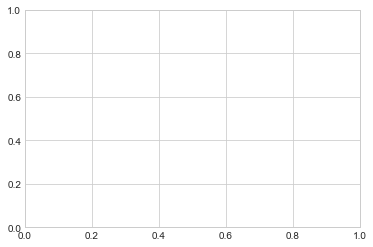

In [36]:
fig = plt.figure()
ax = plt.axes()

La variable  `fig`  correspond à un conteneur qui contient tous les objets (axes, labels, données, etc). Les axes correspondent au carré que l'on voit au-dessus, et qui contiendra par la suite les données du graphe.

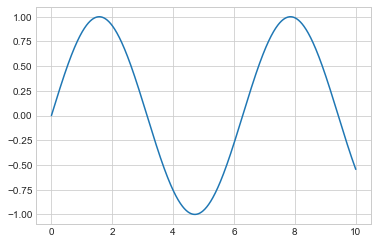

In [37]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

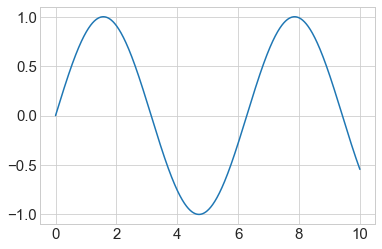

In [41]:
# tient en une ligne de code :
plt.plot(x, np.sin(x))

## Exemple :

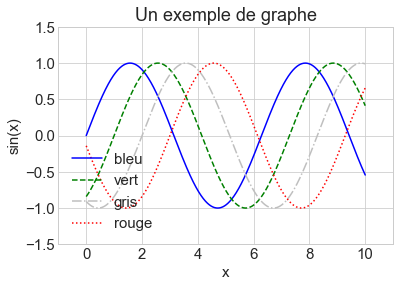

In [42]:
# Changer la taille de police par défaut
plt.rcParams.update({'font.size': 15})

fig = plt.figure()
ax = plt.axes()

# Couleur spécifiée par son nom, ligne solide
plt.plot(x, np.sin(x - 0), color='blue', linestyle='solid', label='bleu')

# Nom court pour la couleur, ligne avec des traits
plt.plot(x, np.sin(x - 1), color='g', linestyle='dashed', label='vert')

# Valeur de gris entre 0 et 1, des traits et des points
plt.plot(x, np.sin(x - 2), color='0.75', linestyle='dashdot', label='gris')

# Couleur spécifié en RGB, avec des points
plt.plot(x, np.sin(x - 3), color='#FF0000', linestyle='dotted', label='rouge')

# Les limites des axes, essayez aussi les arguments 'tight' et 'equal' 
# pour voir leur effet
plt.axis([-1, 11, -1.5, 1.5]);

# Les labels
plt.title("Un exemple de graphe")

# La légende est générée à partir de l'argument label de la fonctio
# plot. L'argument loc spécifie le placement de la légende
plt.legend(loc='lower left');

# Titres des axes
ax = ax.set(xlabel='x', ylabel='sin(x)')


# Données discrètes

Dans le cas de données discrètes (des points), nous utilisons souvent les barres d'erreur pour représenter, pour chaque point, l'incertitude quant à sa valeur exacte. Souvent la longueur des barres correspond à l'écart type des observations empiriques. C'est chose aisée avec Matplotlib.

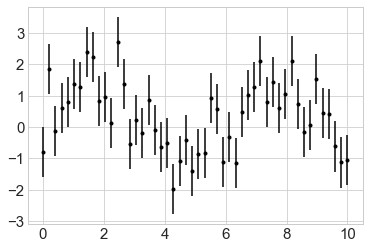

In [43]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

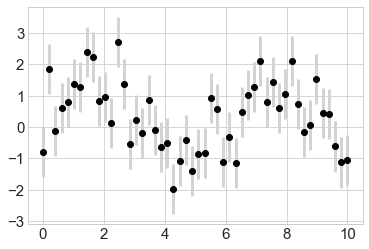

In [44]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

# Personnalisation et sous-graphes

Matplotlib est très flexible. Quasiment tous les aspects d'une figure peuvent être configurés par l'utilisateur soit pour y ajouter des données, soit pour améliorer l'aspect esthétique.

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic']


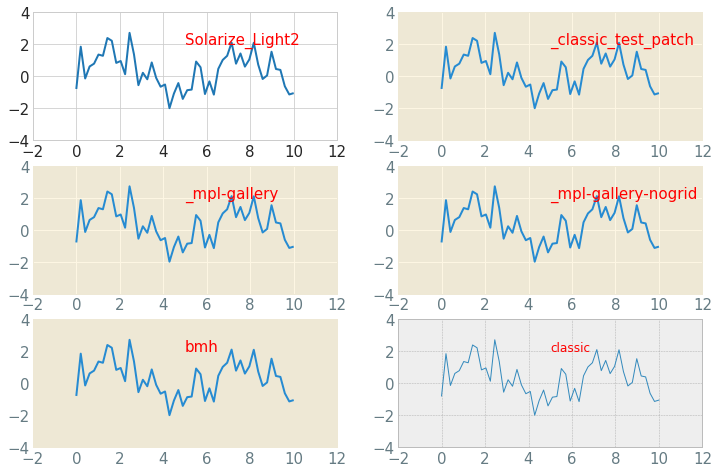

In [45]:
print(plt.style.available[:6])

# Notez la taille de la figure
fig = plt.figure(figsize=(12,8))
for i in range(6):
    # On peut ajouter des sous graphes ainsi
    fig.add_subplot(3,2,i+1)
    plt.style.use(plt.style.available[i])
    plt.plot(x, y)
    
    # Pour ajouter du texte
    plt.text(s=plt.style.available[i], x=5, y=2, color='red')

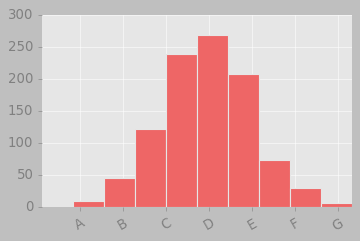

In [49]:
# On peut aussi tout personnaliser à la main
x = np.random.randn(1000)

plt.style.use('classic')
fig=plt.figure(figsize=(5,3))
ax = plt.axes(facecolor='#E6E6E6')

# Afficher les ticks en dessous de l'axe
ax.set_axisbelow(True)

# Cadre en blanc
plt.grid(color='w', linestyle='solid')

# Cacher le cadre
# ax.spines contient les lignes qui entourent la zone où les 
# données sont affichées.
for spine in ax.spines.values():
    spine.set_visible(False)
    
# Cacher les marqueurs en haut et à droite
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# Nous pouvons personnaliser les étiquettes des marqueurs
# et leur appliquer une rotation
marqueurs = [-3, -2, -1, 0, 1, 2, 3]
xtick_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
plt.xticks(marqueurs, xtick_labels, rotation=30)

# Changer les couleur des marqueurs
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# Changer les couleur des barres
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');


---

# <center> Seaborn </center>

Seaborn est une librairie qui vient s'ajouter à Matplotlib, remplace certains réglages par défaut et fonctions, et lui ajoute de nouvelles fonctionnalités. Seaborn vient corriger trois défauts de Matplotlib:

- Matplotlib, surtout dans les versions avant la 2.0, ne génère pas des graphiques d'une grande qualité esthétique.

- Matplotlib ne possède pas de fonctions permettant de créer facilement des analyses statistiques sophistiquées.

- Les fonctions de Matplotlib ne sont pas faites pour interagir avec les Dataframes de Panda.

Seaborn fournit une interface qui permet de palier ces problèmes. Il utilise toujours Matplotlib "sous le capot", mais le fait en exposant des fonctions plus intuitives.

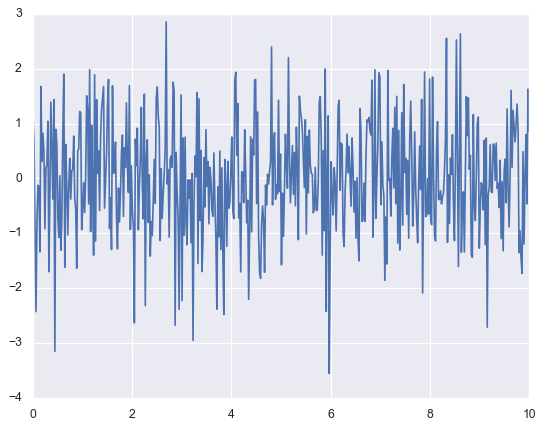

In [50]:
import seaborn as sns
sns.set()

x = np.linspace(0, 10, 500)
y = np.random.randn(500)
plt.plot(x,y)

Seaborn nous fournit aussi des fonctions pour des graphiques utiles pour l'analyse statistique. Par exemple, la fonction `distplot`  permet non seulement de visualiser l'histogramme d'un échantillon, mais aussi d'estimer la distribution dont l'échantillon est issu.

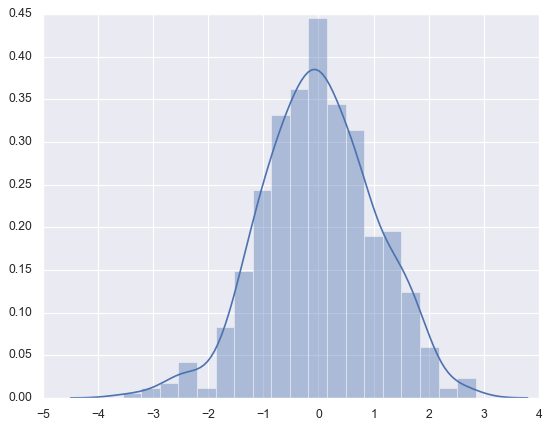

In [51]:
sns.distplot(y, kde=True);

Imaginons que nous voulons travailler sur un ensemble de données provenant du jeu de données "Iris", qui contient des mesures de la longueur et la largeur des sépales et des pétales de trois espèces d'iris. C'est un jeu de données très souvent utilisé pour se faire la main sur des problèmes de machine learning.

In [52]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Pour voir les relations entre ces caractéristiques, on peut faire des graphiques par paire :

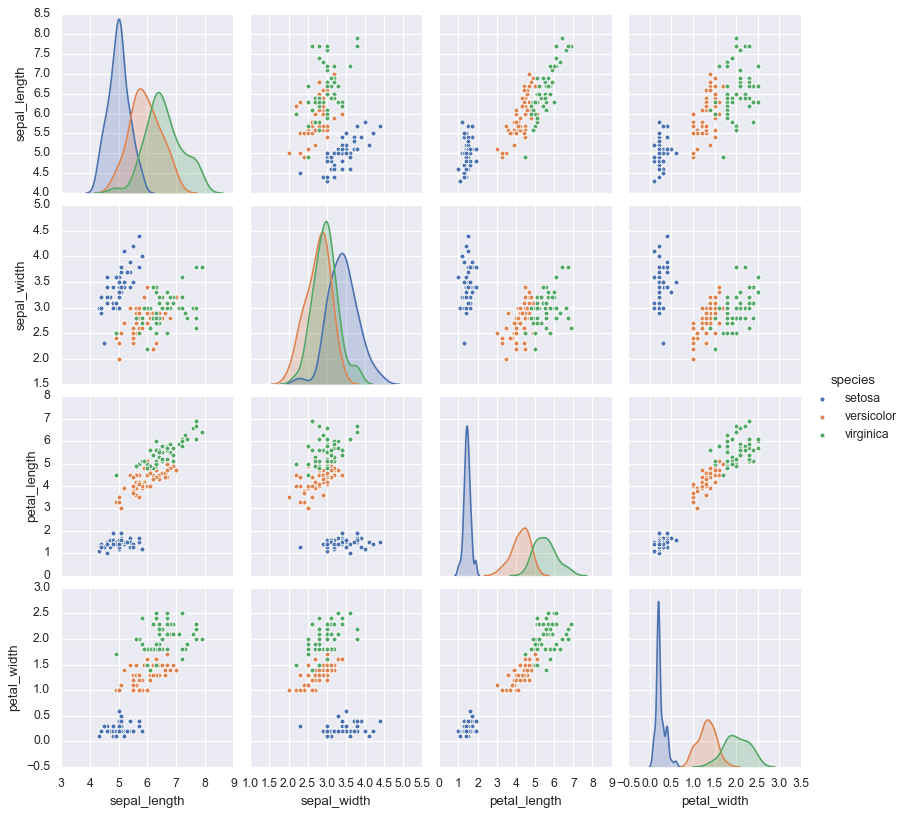

In [53]:
sns.pairplot(iris, hue='species', height=2.5);

La diagonale est traitée différemment, car tracer une variable en fonction d'elle-même n'aurait aucun intérêt. À la place,  `sns.pairplot`  trace un histogramme des données en fonction de la variable en question pour chaque classe de données.

Ici nous voyons par exemple que les variables  `petal_length`  et  `petal_width`  permettent de bien discriminer l'espèce Setosa des autres. Autant sur les nuages de points de la troisième et la quatrième ligne/colonne, ainsi que sur les histogrammes 3 et 4, les points et les barres en bleues sont distinctes des barres des autres couleurs. Ainsi, si nous voulions créer un algorithme pour détecter les setosa, nous utiliserions certainement  `petal_length`  et  petal_width  de manière prédominante.

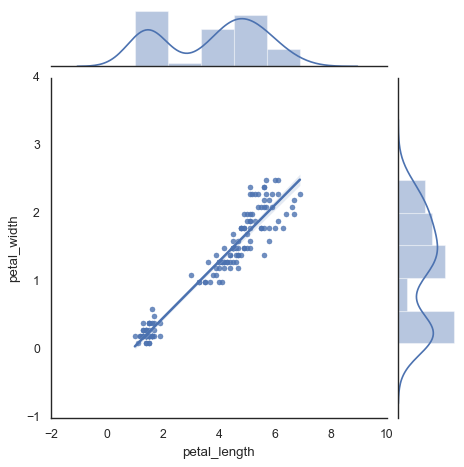

In [54]:
#Nous pouvons aussi voir la distribution jointe de deux caractéristiques :

with sns.axes_style('white'):
    sns.jointplot("petal_length", "petal_width", data=iris, kind='reg')

---

## Entraînez-vous en effectuant une régression linéaire

### Contexte

Dans cette activité, vous allez faire appel à tout ce que vous avez étudié dans la deuxième partie du cours. Nous allons nous intéresser à la relation entre la distance qui nous sépare d'une galaxie, et la vitesse à laquelle elle s'éloigne de nous. Cette relation fut découverte pour la première fois par Erwin Hubble en 1929. 

Pour cela, vous aurez besoin du fichier `hubble.csv`.

Votre tâche consiste à **charger le contenu de ce fichier** grâce à Pandas, **regarder les données** qu'elle contient, et **effectuer une régression linéaire** entre les deux variables **distance et velocity**. 

### Consigne

N'oubliez pas de fournir les coordonnées de la courbe de régression.

Votre graphique devrait être présentable :  titres, labels, taille de police appropriée, et qui représente les données et la courbe.

In [78]:
from urllib import request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [58]:
df = pd.read_csv("hubble_data.csv.")
df.head()

,distance,recession_velocity
0,0.032,170
1,0.034,290
2,0.214,-130
3,0.263,-70
4,0.275,-185


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   distance            24 non-null     float64
 1   recession_velocity  24 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 512.0 bytes


In [60]:
df.describe()

,distance,recession_velocity
count,24.000000,24.000000
mean,0.911375,373.125000
std,0.645496,371.254666
min,0.032000,-220.000000
25%,0.406250,165.000000
50%,0.900000,295.000000
75%,1.175000,537.500000
max,2.000000,1090.000000


In [61]:
df.shape

(24, 2)

In [85]:
df.distance.values

array([0.032, 0.034, 0.214, 0.263, 0.275, 0.275, 0.45 , 0.5  , 0.5  ,
       0.63 , 0.8  , 0.9  , 0.9  , 0.9  , 0.9  , 1.   , 1.1  , 1.1  ,
       1.4  , 1.7  , 2.   , 2.   , 2.   , 2.   ])

In [86]:
df.distance.values.reshape(-1,1)

array([[0.032],
       [0.034],
       [0.214],
       [0.263],
       [0.275],
       [0.275],
       [0.45 ],
       [0.5  ],
       [0.5  ],
       [0.63 ],
       [0.8  ],
       [0.9  ],
       [0.9  ],
       [0.9  ],
       [0.9  ],
       [1.   ],
       [1.1  ],
       [1.1  ],
       [1.4  ],
       [1.7  ],
       [2.   ],
       [2.   ],
       [2.   ],
       [2.   ]])

In [80]:
from sklearn.linear_model import LinearRegression

X = df.distance.values.reshape(-1,1) # reforme la shape en matrice
Y = df.recession_velocity

# On importe le modèle et on l'applique
lr = LinearRegression()
lr.fit(X, Y)

LinearRegression()

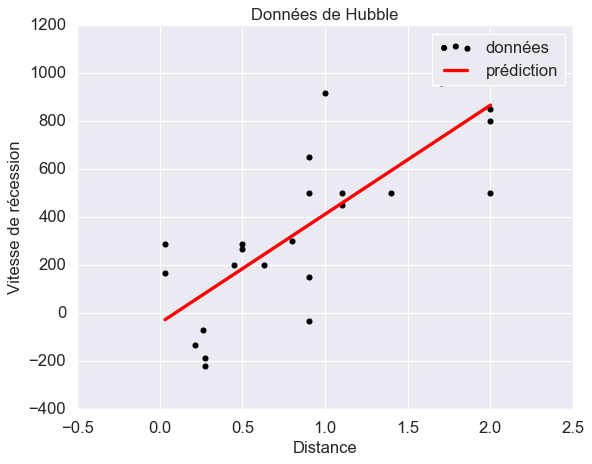

In [82]:
BIGGER_SIZE = 15

plt.rc('font', size=BIGGER_SIZE) # taille de texte par défaut
plt.rc('axes', titlesize=BIGGER_SIZE) # taille des titres des axes
plt.rc('axes', labelsize=BIGGER_SIZE) # taille des labels des axes
plt.rc('xtick', labelsize=BIGGER_SIZE) # taille des ticks des ascisses

plt.rc('ytick', labelsize=BIGGER_SIZE) # taille des ticks des ordonnées
plt.rc('legend', fontsize=BIGGER_SIZE) # taille de la légende
plt.rc('figure', titlesize=BIGGER_SIZE) # taille du titre
plt.figure()
plt.title("Données de Hubble")
plt.scatter(X, Y, color='black', label="données")
plt.plot(X, lr.predict(X), color='red', linewidth=3, label="prédiction")
plt.xlabel("Distance")
plt.ylabel("Vitesse de récession")
plt.legend()
plt.show()

---

# <center> Pandas </center>

In [3]:
import pandas as pd
import numpy as np

In [6]:
famille_panda = [
    np.array([100, 5  , 20, 80]), # maman panda
    np.array([50 , 2.5, 10, 40]), # bébé panda
    np.array([110, 6  , 22, 80]), # papa panda
]
famille_panda

[array([100,   5,  20,  80]),
 array([50. ,  2.5, 10. , 40. ]),
 array([110,   6,  22,  80])]

In [7]:
famille_panda = [
    [100, 5  , 20, 80], # maman panda
    [50 , 2.5, 10, 40], # bébé panda
    [110, 6  , 22, 80], # papa panda
]
famille_panda_numpy = np.array(famille_panda)
famille_panda_numpy

array([[100. ,   5. ,  20. ,  80. ],
       [ 50. ,   2.5,  10. ,  40. ],
       [110. ,   6. ,  22. ,  80. ]])

### Transformation en df

In [8]:
famille_panda_df = pd.DataFrame(famille_panda_numpy,
                                index = ['maman', 'bebe', 'papa'],
                                columns = ['pattes', 'poil', 'queue', 'ventre'])
famille_panda_df

,pattes,poil,queue,ventre
maman,100.0,5.0,20.0,80.0
bebe,50.0,2.5,10.0,40.0
papa,110.0,6.0,22.0,80.0


Le nom des lignes est appelé **index**. Un index peut être une chaîne de caractères (un label) ou un nombre entier. Quand aucun index n'est spécifié à la création du dataframe, il est initialisé par défaut avec une suite continue d'entiers commençant par 0.

## <center> Quelques fonctionnalités des DataFrames </center>

### Accéder à une colonne

In [10]:
famille_panda_df.ventre

maman    80.0
bebe     40.0
papa     80.0
Name: ventre, dtype: float64

In [11]:
famille_panda_df["ventre"]

maman    80.0
bebe     40.0
papa     80.0
Name: ventre, dtype: float64

L'objet que renvoie `famille_panda_df["ventre"]` est de type pandas.Series. Pour obtenir les valeurs de la colonne ventre au format numpy, il faut saisir `famille_panda_df["ventre"].values` :

In [12]:
famille_panda_df["ventre"].values

array([80., 40., 80.])

Parcourrons maintenant tous les pandas un à un, grâce à la méthode `iterrows` qui renvoie (à chaque itération de la boucle `for`) un tuple dont le premier élément est l'index de la ligne, et le second le contenu de la ligne en question :

In [13]:
for ind_ligne, contenu_ligne in famille_panda_df.iterrows():
    print("Voici le panda %s :" % ind_ligne)
    print(contenu_ligne)
    print("--------------------")

Voici le panda maman :
pattes    100.0
poil        5.0
queue      20.0
ventre     80.0
Name: maman, dtype: float64
--------------------
Voici le panda bebe :
pattes    50.0
poil       2.5
queue     10.0
ventre    40.0
Name: bebe, dtype: float64
--------------------
Voici le panda papa :
pattes    110.0
poil        6.0
queue      22.0
ventre     80.0
Name: papa, dtype: float64
--------------------


Accédons maintenant au papa panda : d'abord par sa position (position 2), puis par son nom "papa". Le résultat retourné est exactement le même dans les 2 cas.

In [ ]:
famille_panda_df.iloc[2] # Avec iloc(), indexation positionnelle
famille_panda_df.loc["papa"] # Avec loc(), indexation par label

**Déterminons les pandas dont le diamètre du ventre est de 80cm :**

In [14]:
famille_panda_df["ventre"] == 80

maman     True
bebe     False
papa      True
Name: ventre, dtype: bool

Ici, on teste chaque élément de la colonne "ventre" en demandant s'il est égal à 80. On obtient la réponse suivante : "maman" : True, "bebe" : False, "papa" : True.

Le résultat de cette opération est très pratique pour filtrer des lignes ! Par exemple, pour sélectionner **uniquement** les pandas dont le ventre est de 80cm, il suffit d'intégrer ce précédent résultat en tant que masque, comme ceci :

In [16]:
masque = famille_panda_df["ventre"] == 80
pandas_80 = famille_panda_df[masque]

# On écrit plus souvent cela de cette manière :
# pandas_80 = famille_panda_df[famille_panda_df["ventre"] == 80]

pandas_80

,pattes,poil,queue,ventre
maman,100.0,5.0,20.0,80.0
papa,110.0,6.0,22.0,80.0


**Pour inverser le masque, il suffit d'utiliser l'opérateur`~`, et nous sélectionnons les pandas qui n'ont pas un ventre de 80cm :**

In [17]:
famille_panda_df[~masque]

,pattes,poil,queue,ventre
bebe,50.0,2.5,10.0,40.0


### Assembler des dataframes 

In [18]:
quelques_pandas = pd.DataFrame([[105,4,19,80],[100,5,20,80]],      # deux nouveaux pandas
                               columns = famille_panda_df.columns) 
                               # même colonnes que famille_panda_df
tous_les_pandas = famille_panda_df.append(quelques_pandas)
tous_les_pandas

<ipython-input-18-97394234b1db>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tous_les_pandas = famille_panda_df.append(quelques_pandas)


,pattes,poil,queue,ventre
maman,100.0,5.0,20.0,80.0
bebe,50.0,2.5,10.0,40.0
papa,110.0,6.0,22.0,80.0
0,105.0,4.0,19.0,80.0
1,100.0,5.0,20.0,80.0


### Supprimer des doublons

In [19]:
tous_les_pandas.drop_duplicates()

,pattes,poil,queue,ventre
maman,100.0,5.0,20.0,80.0
bebe,50.0,2.5,10.0,40.0
papa,110.0,6.0,22.0,80.0
0,105.0,4.0,19.0,80.0


Le résultat de cette ligne ne modifie pas le dataframe  `tous_les_pandas`  . Il ne fait que renvoyer un autre dataframe. Dans l'état actuel, ce nouveau dataframe est juste affiché et n'est pas enregistré en mémoire : il sera donc perdu. Pour le garder, on peut soit l'enregistrer dans une nouvelle variable :

- `pandas_uniques = tous_les_pandas.drop_duplicates()`

Soit remplacer la variable tous_les_pandas par ce nouveau dataframe dédoublonné :

- `tous_les_pandas = tous_les_pandas.drop_duplicates()`

### Accéder aux noms des colonnes

In [20]:
famille_panda_df.columns

Index(['pattes', 'poil', 'queue', 'ventre'], dtype='object')

### Créer une nouvelle colonne, composée de chaînes de caractères

In [22]:
famille_panda_df["sexe"] = ["f", "f", "m"] 
# la maman et le bébé sont des femelles, le papa est un mâle

# on affiche la colonne
famille_panda_df["sexe"]

maman    f
bebe     f
papa     m
Name: sexe, dtype: object

### Obtenir le nombre de lignes

In [ ]:
len(famille_panda_df)

### Obtenir les valeurs distinctes d'une colonne :

In [24]:
# pour la colonne ventre, il y a deux valeurs distinctes : 40 et 80
famille_panda_df.ventre.unique()

array([80., 40.])

---

## <center> Manipulez les données contenues dans vos DataFrames </center>

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')

In [26]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Age

In [27]:
titanic.age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

### Description

In [ ]:
titanic.describe(include="all")

L'argument `include="all"` sert à inclure les colonnes non-numérique dans l'analyse. Cette fonction nous fournit pleins de données très utiles sur la répartition de nos données (minimum, maximum, moyenne, etc.)

### Données manquantes

Le résultat de toute opération impliquant une NaN est à son tour un NaN. Par exemple, si une de vos colonnes contient une NaN (parce que la vraie valeur n'est pas connue), le résultat de toutes les opérations arithmétiques qui impliquent cette valeur (comme la moyenne de la colonne) sera NaN, sauf si vous prenez soin de ne pas prendre en compte cette valeur

#### Remplacer les NaN par d'autres valeurs (fllna)

In [29]:
# Renvoie un DataFrame où toutes les  NaN  dans la colonne  age  on été remplacés par 0.
titanic.fillna(value={"age": 0}).age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     0.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [ ]:
# Remplir les NaN par les valeurs précédentes:
titanic.fillna(method="pad").age.head(10)

#### Supprimer les valeurs NaN

La fonction  `dropna`  permet de supprimer les axes (colonnes ou lignes) qui contiennent des NaN. Par défaut, elle supprime les lignes concernées:

In [30]:
titanic.dropna().head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
21,1,2,male,34.0,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False


In [31]:
# Mais on peut aussi supprimer carrément les colonnes
titanic.dropna(axis="columns").head()

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True


### Renommer une colonne

In [ ]:
titanic.rename(columns={"sex":"sexe"})
# Renomme la colonne "sex" en "sexe".

In [ ]:
f = lambda x: x+1
titanic.rename(index=f)
# applique la fonction  f  à tous les index

### Supprimer des axes

In [ ]:
titanic.drop(0)
# Supprimera la ligne dont l'index est égal à 0

In [ ]:
titanic.drop(columns=["age"])
# Supprime la colonne "age"

## Tableaux croisés dynamiques

Pour voir la répartition des survivants en fonction de leurs sexes et de leur type de billet, nous n'avons besoin que d'une seule ligne:

In [32]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Par défaut, la fonction pivot_table groupe les données en fonction des critères que nous spécifions, et agrège les résultats en moyenne. Nous pouvons spécifier d'autres fonctions. Par exemple, si nous voulons savoir quelle est le nombre total de survivants dans chaque cas, nous utiliserons la fonction  `sum`  .

In [33]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc="sum")

class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


La fonction pivot_table est très puissante, et permet même de faire des agrégations à plusieurs niveaux. Par exemple, nous pouvons voir l'âge des survivants comme une dimension supplémentaires. Le nombre exact d'années nous intéressant peu, nous regrouperons les âge en deux catégories, grâce à la fonction  `cut`  .

In [34]:
titanic.dropna(inplace=True)
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.500000
       (18, 80]  0.968254  0.875000  0.666667
male   (0, 18]   0.800000  1.000000  1.000000
       (18, 80]  0.397436  0.333333  0.250000